## Problem Statement

<b>Health Insurance Lead Prediction</b> <br><br>
Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information

### Step 1: Importing the Relevant Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [55]:
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [56]:
train.shape, test.shape

((50882, 14), (21805, 13))

* __There are 50882 rows and 14 columns in Train set whereas 21805 rows and 13 columns in Test set.__

In [57]:
train.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [58]:
test.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0
6,50889,C2,3479,Owned,Individual,56,56,No,X5,14+,4.0,17,19152.0
7,50890,C13,396,Rented,Individual,41,41,No,NaN,NaN,NaN,16,11034.0
8,50891,C18,513,Owned,Individual,22,22,No,X3,NaN,NaN,22,10784.0
9,50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [60]:
#ratio of null values - Train set
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [61]:
#ratio of null values - Test set
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

* __There are around 23%, 39% and 39% of missing values in Health Indicator,Holding_Policy_Duration, and Holding_Policy_Type columns respectively.__

In [62]:
#categorical columns
cat_train=train.select_dtypes(include=[np.object]).columns
print ("Categorical Columns in train set =",cat_train)

cat_test=test.select_dtypes(include=[np.object]).columns
print ("Categorical Columns in test set =",cat_test)

Categorical Columns in train set = Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')
Categorical Columns in test set = Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')


In [63]:
#Numerical columns
numeric_train=train.select_dtypes(include=[np.int64,np.float64]).columns
print ("Numeric Columns in train set =",numeric_train)

numeric_test=test.select_dtypes(include=[np.int64,np.float64]).columns
print ("Numeric Columns in test set =",numeric_test)

Numeric Columns in train set = Index(['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')
Numeric Columns in test set = Index(['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')


### Data Cleaning

In [64]:
train_copy=train.copy()
test_copy=test.copy()

In [65]:
# Missing value imputation

In [66]:
print(train['Health Indicator'].value_counts())
print(test['Health Indicator'].value_counts())


X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64


In [67]:
#Imputing with Mode
train['Health Indicator']= train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
test['Health Indicator']= test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

In [68]:
print(train['Holding_Policy_Duration'].value_counts())
print(test['Holding_Policy_Duration'].value_counts())

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64
14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64


In [69]:
#Imputing with Mode
train['Holding_Policy_Duration']= train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])
test['Holding_Policy_Duration']= test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])

In [70]:
print(train['Holding_Policy_Type'].value_counts())
print(test['Holding_Policy_Type'].value_counts())

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64
3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64


In [71]:
#Imputing with Mode
train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mean())
test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mean())

In [72]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [73]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

__Successfully imputed all the missing values .__

### Exploratory Data Analysis

In [74]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [75]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0


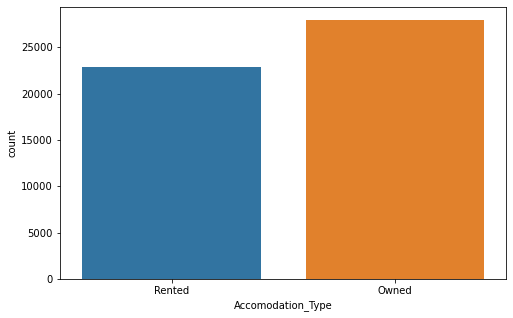

In [76]:
plt.figure(figsize=(8,5))
sns.countplot('Accomodation_Type',data=train)

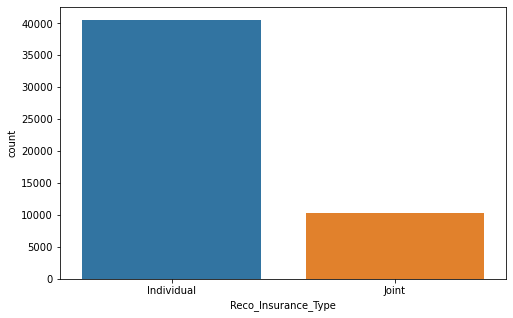

In [77]:
plt.figure(figsize=(8,5))
sns.countplot('Reco_Insurance_Type',data=train)

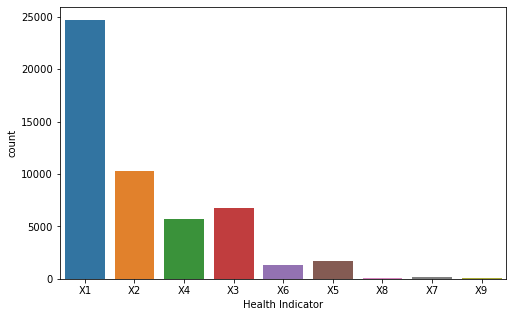

In [78]:
plt.figure(figsize=(8,5))
sns.countplot('Health Indicator',data=train)

In [79]:
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

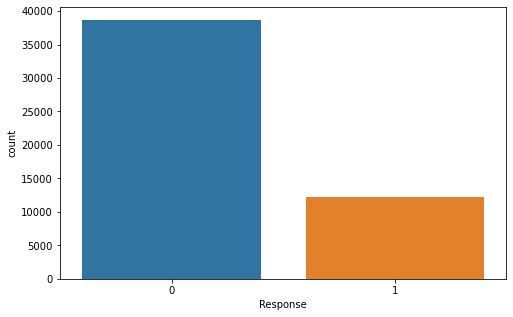

In [80]:
plt.figure(figsize=(8,5))
sns.countplot('Response',data=train)

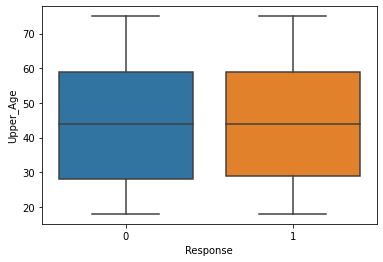

In [81]:
#Bivariate Analysis - Upper_Age & Response

sns.boxplot(x='Response', y='Upper_Age',data=train)

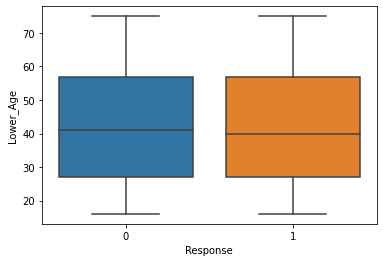

In [82]:
#Bivariate Analysis - Lower_Age & Response

sns.boxplot(x='Response', y='Lower_Age',data=train)

The persons from age 28 to 58 interested in health insurance

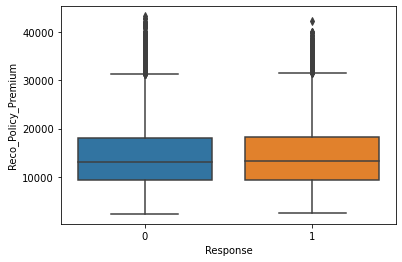

In [83]:
sns.boxplot(x='Response', y='Reco_Policy_Premium',data=train)

The people who is interested for health insurance is looking for annual premium 10000 to 19000

###  Building Model

In [84]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [85]:
#One Hot Coding:
train = pd.get_dummies(train, columns=['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'])

#One Hot Coding:
test = pd.get_dummies(test, columns=['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'])

In [86]:
train.head()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_0,City_Code_1,...,Holding_Policy_Duration_5,Holding_Policy_Duration_6,Holding_Policy_Duration_7,Holding_Policy_Duration_8,Holding_Policy_Duration_9,Holding_Policy_Duration_10,Holding_Policy_Duration_11,Holding_Policy_Duration_12,Holding_Policy_Duration_13,Holding_Policy_Duration_14
0,1,3213,36,36,3.000000,22,11628.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,1117,75,22,2.439228,22,30510.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3732,32,32,1.000000,19,7450.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4378,52,48,3.000000,19,17780.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,2190,44,44,1.000000,16,10404.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [88]:
# Seperate Features and Target
X= train.drop(columns = ['Response'], axis=1)
y= train['Response']

In [89]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

#### ML models

In [90]:
!pip install xgboost

In [91]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [92]:
#XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

xgbm = XGBRegressor()
xgbm.fit(X_train,y_train)
pred3 = xgbm.predict(X_valid)
#np.sqrt(mean_squared_error(y_valid, pred3))
rocXGB= metrics.roc_auc_score(y_valid,pred3)

In [93]:
print("AUC ROC SCORE:",rocXGB )

AUC ROC SCORE: 0.6516631811796413


Validation Set AUC_ROC Score is around 0.65 for XGBoost model

In [94]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [95]:
algos = [LinearRegression(),  Ridge(), Lasso(),LogisticRegression(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','LogisticRegression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

roc_list = []

In [96]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    roc= metrics.roc_auc_score(y_valid,y_pred)
    #rmse = np.sqrt(roc)
    roc_list.append(roc)

In [98]:
evaluation = pd.DataFrame({'Model': names,
                           'AUC_ROC': roc_list})
evaluation

,Model,AUC_ROC
0,Linear Regression,0.568307
1,Ridge Regression,0.568312
2,Lasso Regression,0.500101
3,LogisticRegression,0.500000
4,K Neighbors Regressor,0.500393
5,Decision Tree Regressor,0.560003


In [97]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')
final_predictions = xgbm.predict(test)
submission['Response'] = final_predictions
#only positive predictions for the target variable
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('submission_final.csv', index=False)